# MODELOS SVM 

## Modelo com 300 linhas

In [387]:
# Importar bibliotecas

import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn.metrics import accuracy_score
import seaborn as sb

In [319]:
# Importar dataset

df = pd.read_excel(r"C:\Users\Usuário\Desktop\dataset_deslizamentos.xlsx")
print(df.head()) # mostra as primeiras 5 linhas

   precipitacao  pluviometro  umidade  deslizamento
0             0            0       20             0
1             1           50       36             0
2             0            0       36             0
3             1           15       38             0
4             0            0       38             0


In [320]:
# Verificar o total de linhas e colunas no dataset

df.shape

(300, 4)

In [321]:
# Descrever dados estatísticos do dataset

df.describe()

,precipitacao,pluviometro,umidade,deslizamento
count,300.000000,300.000000,300.000000,300.000000
mean,0.443333,10.053333,44.526667,0.040000
std,0.497609,13.435234,15.490075,0.196287
min,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,34.000000,0.000000
50%,0.000000,0.000000,44.000000,0.000000
75%,1.000000,19.000000,55.000000,0.000000
max,1.000000,70.000000,83.000000,1.000000


In [322]:
# Verificar o número de ocorrências de deslizamento e não deslizamento (sim e não)

df['deslizamento'].value_counts()

0    288
1     12
Name: deslizamento, dtype: int64

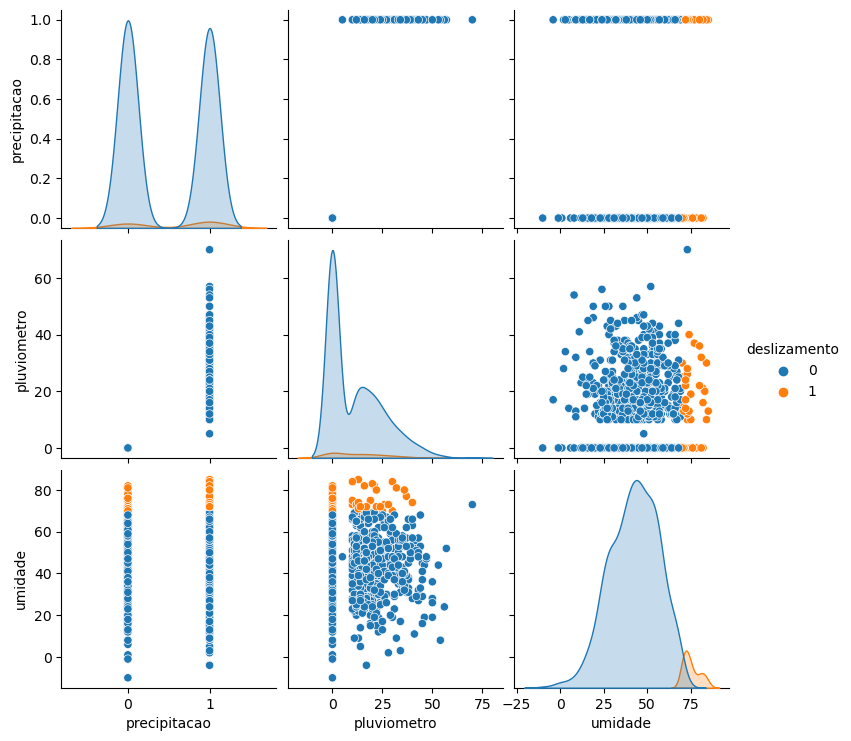

In [391]:
sb.pairplot(df, hue = "deslizamento")

In [323]:
# Separação das variáveis

X = df.drop(columns='deslizamento', axis=1)
Y = df['deslizamento']

In [324]:
# Variáveis independentes

print(X)

     precipitacao  pluviometro  umidade
0               0            0       20
1               1           50       36
2               0            0       36
3               1           15       38
4               0            0       38
..            ...          ...      ...
295             1           10       35
296             0            0       30
297             0            0       40
298             1           10       49
299             0            0       77

[300 rows x 3 columns]


In [325]:
# Variável dependente

print(Y)

0      0
1      0
2      0
3      0
4      0
      ..
295    0
296    0
297    0
298    0
299    1
Name: deslizamento, Length: 300, dtype: int64


In [326]:
# Criação de instância e fit

scaler = StandardScaler()
scaler.fit(X)

StandardScaler()

In [327]:
# Transformar as variáveis "x" em dados de entrada

standarized_data = scaler.transform(X) 
X = standarized_data 

print(X)
print(Y)

[[-8.92416487e-01 -7.49531496e-01 -1.58602502e+00]
 [ 1.12055303e+00  2.97824451e+00 -5.51379724e-01]
 [-8.92416487e-01 -7.49531496e-01 -5.51379724e-01]
 [ 1.12055303e+00  3.68801307e-01 -4.22049062e-01]
 [-8.92416487e-01 -7.49531496e-01 -4.22049062e-01]
 [-8.92416487e-01 -7.49531496e-01 -2.92718399e-01]
 [-8.92416487e-01 -7.49531496e-01 -9.87224057e-02]
 [ 1.12055303e+00  1.48713411e+00  9.52735880e-02]
 [-8.92416487e-01 -7.49531496e-01  1.59938919e-01]
 [-8.92416487e-01 -7.49531496e-01  2.24604250e-01]
 [ 1.12055303e+00 -3.76753895e-01  2.24604250e-01]
 [-8.92416487e-01 -7.49531496e-01  4.83265575e-01]
 [-8.92416487e-01 -7.49531496e-01  4.83265575e-01]
 [ 1.12055303e+00  7.41578908e-01  6.12596238e-01]
 [-8.92416487e-01 -7.49531496e-01  6.77261569e-01]
 [-8.92416487e-01 -7.49531496e-01  6.77261569e-01]
 [-8.92416487e-01 -7.49531496e-01  8.06592232e-01]
 [-8.92416487e-01 -7.49531496e-01  9.35922894e-01]
 [ 1.12055303e+00  1.11435651e+00  1.19458422e+00]
 [-8.92416487e-01 -7.49531496e-

In [328]:
# Dividir o dataset na proporção 70/30

X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size=0.3, stratify = Y, random_state=2)

# Imprimir o tamanho do dataset original
print("Dataset original:", X.shape)

# Imprimir o dataset de teste
print("Dataset de teste:", X_test.shape)

# Imprimir o dataset de treinamento
print("Dataset de treinamento (X_train):", X_train.shape)

Dataset original: (300, 3)
Dataset de teste: (90, 3)
Dataset de treinamento (X_train): (210, 3)


## 🦾 Criação do modelo 

In [329]:
classifier = svm.SVC(kernel='linear')

In [330]:
# Treinar modelo usando o dataset de teste
classifier.fit(X_train, Y_train)

SVC(kernel='linear')

In [331]:
# Visualizar o coef

classifier.coef_[0]

array([-0.07190839, -0.13999146,  1.93379988])

In [332]:
# Separando w1 

w1 =classifier.coef_[0][0]
print(w1)

-0.07190839160137696


In [333]:
# Separando w2

w2 = classifier.coef_[0][1]
print(w2)

-0.1399914586815054


In [334]:
# Utilizando o intercept como w0

w3 = classifier.intercept_[0]
print(w3)

-3.8547802693429505


In [335]:
# Acurácia nos dados de treinamento
train_pred = classifier.predict(X_train)
accuracy_train = accuracy_score(train_pred, Y_train)

In [336]:
print("Pontuação de acurácia dos dados de treinamento = {}".format(accuracy_train))

Pontuação de acurácia dos dados de treinamento = 0.9904761904761905


In [337]:
#Acurácia no dados de teste
test_pred = classifier.predict(X_test)
accuracy_test = accuracy_score(test_pred, Y_test)

In [338]:
print("Pontuação de acurácia dos dados de teste = {}".format(accuracy_test))

Pontuação de acurácia dos dados de teste = 0.9666666666666667


## 📊 Métricas

In [339]:
import seaborn as sns
from sklearn.metrics import recall_score
from sklearn.model_selection import learning_curve
from sklearn.metrics import f1_score
from sklearn.metrics import roc_curve, roc_auc_score

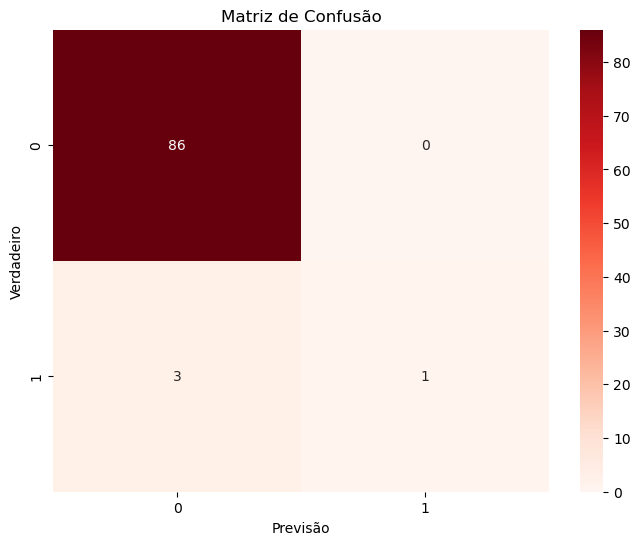

In [340]:
# Calcular a matriz de confusão
cm = confusion_matrix(Y_test, test_pred)

# Plotar a matriz de confusão
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Reds')
plt.xlabel('Previsão')
plt.ylabel('Verdadeiro')
plt.title('Matriz de Confusão')
plt.show()

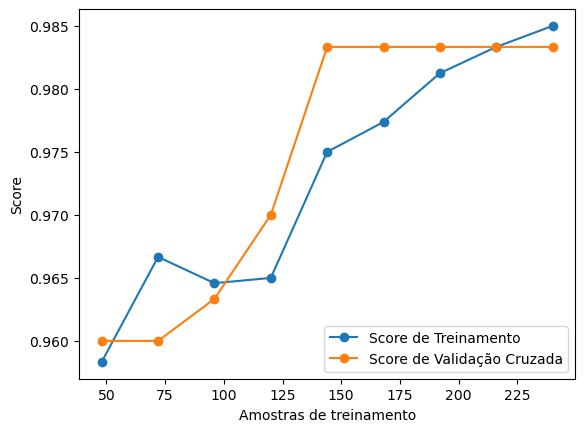

In [341]:
train_sizes, train_scores, test_scores = learning_curve(classifier, X, Y, cv=5, train_sizes=np.linspace(0.1, 1.0, 10))

train_scores_mean = np.mean(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)

plt.plot(train_sizes, train_scores_mean, 'o-', label="Score de Treinamento")
plt.plot(train_sizes, test_scores_mean, 'o-', label="Score de Validação Cruzada")
plt.legend(loc="best")
plt.xlabel("Amostras de treinamento")
plt.ylabel("Score")
plt.show()

In [342]:
# F-score nos dados de treinamento
f1_train = f1_score(Y_train, train_pred)

print("F-score nos dados de treinamento = {}".format(f1_train))

F-score nos dados de treinamento = 0.8571428571428571


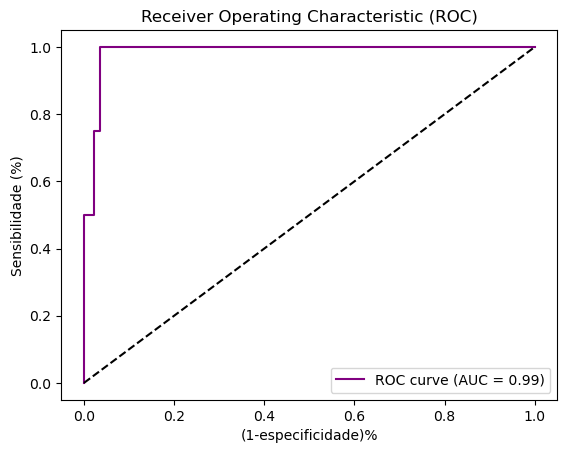

In [343]:
# Calcular as probabilidades das classes positivas
probabilities = classifier.decision_function(X_test)

# Calcular a taxa de falsos positivos e a taxa de verdadeiros positivos
fpr, tpr, thresholds = roc_curve(Y_test, probabilities)

# Calcular a área sob a curva ROC (AUC-ROC)
auc = roc_auc_score(Y_test, probabilities)

# Plotar a curva ROC
plt.plot(fpr, tpr, color='purple', label='ROC curve (AUC = {:.2f})'.format(auc))
plt.plot([0, 1], [0, 1], 'k--')  # Linha de referência para uma classificação aleatória
plt.xlabel('(1-especificidade)%')
plt.ylabel('Sensibilidade (%)')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc='lower right')
plt.show()

## 🔮 Input para predição

In [356]:
# Exemplo de valores de precipitação, pluviômetro e umidade a serem previstos
novo_dado = np.array([[0, 0, 76]])

# Aplicar a transformação aos novos dados
novo_dado_transformado = scaler.transform(novo_dado)

# Fazer a predição dos deslizamentos
predicao = classifier.predict(novo_dado_transformado)

if predicao == 1:
    print("Desliza")
else:
    print("Não desliza")

Desliza


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


## Modelo com dados originais

In [393]:
# Importar dataset

df = pd.read_excel(r"C:\Users\Usuário\Desktop\teste_deslizamentos.xlsx")
print(df.head()) # mostra as primeiras 5 linhas

   precipitacao  pluviometro  umidade  deslizamento
0             0            0       20             0
1             1           50       36             0
2             0            0       36             0
3             1           15       38             0
4             0            0       38             0


In [394]:
# Verificar o total de linhas e colunas no dataset

df.shape

(74, 4)

In [395]:
# Descrever dados estatísticos do dataset

df.describe()

,precipitacao,pluviometro,umidade,deslizamento
count,74.000000,74.000000,74.000000,74.000000
mean,0.391892,10.067568,44.540541,0.040541
std,0.491505,15.669822,15.672320,0.198569
min,0.000000,0.000000,19.000000,0.000000
25%,0.000000,0.000000,30.000000,0.000000
50%,0.000000,0.000000,44.500000,0.000000
75%,1.000000,18.750000,55.750000,0.000000
max,1.000000,70.000000,74.000000,1.000000


In [396]:
# Verificar o número de ocorrências de deslizamento e não deslizamento (sim e não)

df['deslizamento'].value_counts()

0    71
1     3
Name: deslizamento, dtype: int64

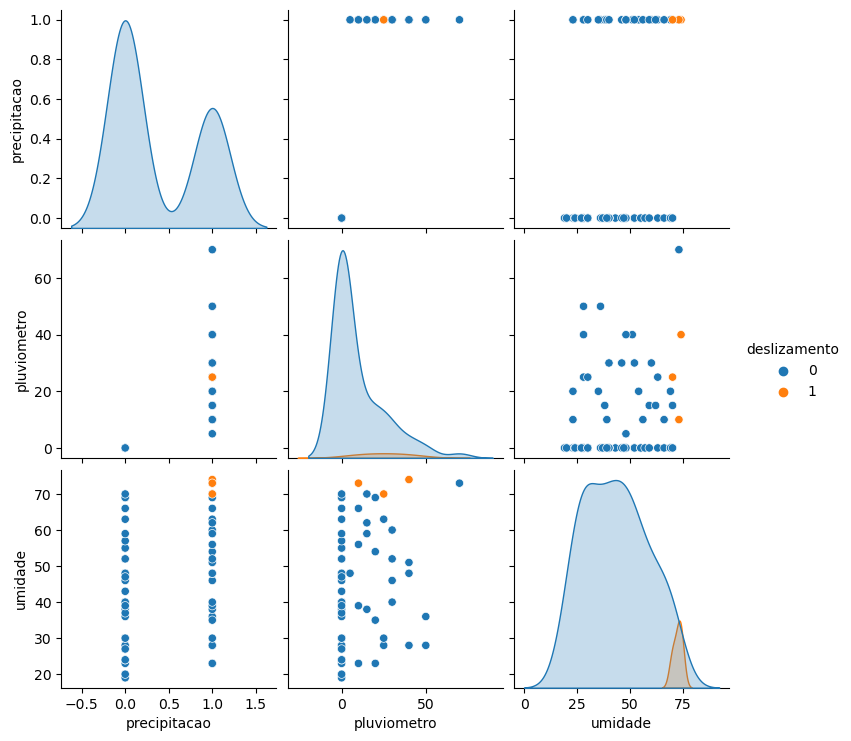

In [401]:
sb.pairplot(df, hue = "deslizamento")

In [397]:
# Separação das variáveis

X = df.drop(columns='deslizamento', axis=1)
Y = df['deslizamento']

In [398]:
# Variáveis independentes

print(X)

    precipitacao  pluviometro  umidade
0              0            0       20
1              1           50       36
2              0            0       36
3              1           15       38
4              0            0       38
..           ...          ...      ...
69             1           10       56
70             1           15       59
71             1           15       62
72             1           10       66
73             1           25       70

[74 rows x 3 columns]


In [399]:
print(Y)

0     0
1     0
2     0
3     0
4     0
     ..
69    0
70    0
71    0
72    0
73    1
Name: deslizamento, Length: 74, dtype: int64


In [400]:
# Criação de instância e fit

scaler = StandardScaler()
scaler.fit(X)

StandardScaler()

In [283]:
# Transformar as variáveis "x" em dados de entrada

standarized_data = scaler.transform(X) 
Z = standarized_data 

print(X)
print(Y)

    precipitacao  pluviometro  umidade
0              0            0       20
1              1           50       36
2              0            0       36
3              1           15       38
4              0            0       38
..           ...          ...      ...
69             1           10       56
70             1           15       59
71             1           15       62
72             1           10       66
73             1           25       70

[74 rows x 3 columns]
0     0
1     0
2     0
3     0
4     0
     ..
69    0
70    0
71    0
72    0
73    1
Name: deslizamento, Length: 74, dtype: int64


In [284]:
# Dividir o dataset na proporção 70/30

X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size=0.3, stratify = Y, random_state=2)

# Imprimir o tamanho do dataset original
print("Dataset original:", X.shape)

# Imprimir o dataset de teste
print("Dataset de teste:", X_test.shape)

# Imprimir o dataset de treinamento
print("Dataset de treinamento (X_train):", X_train.shape)

Dataset original: (74, 3)
Dataset de teste: (23, 3)
Dataset de treinamento (X_train): (51, 3)


## 🦾 Criação do modelo 

In [285]:
classifier = svm.SVC(kernel='linear')

In [286]:
# Treinar modelo usando o dataset de teste
classifier.fit(X_train, Y_train)

SVC(kernel='linear')

In [287]:
# Acurácia nos dados de treinamento
train_pred = classifier.predict(X_train)
accuracy_train = accuracy_score(train_pred, Y_train)

In [288]:
print("Pontuação de acurácia dos dados de treinamento = {}".format(accuracy_train))

Pontuação de acurácia dos dados de treinamento = 1.0


In [289]:
#Acurácia no dados de teste
test_pred = classifier.predict(X_test)
accuracy_test = accuracy_score(test_pred, Y_test)

In [290]:
print("Pontuação de acurácia dos dados de teste = {}".format(accuracy_test))

Pontuação de acurácia dos dados de teste = 0.9565217391304348


## 📊 Métricas

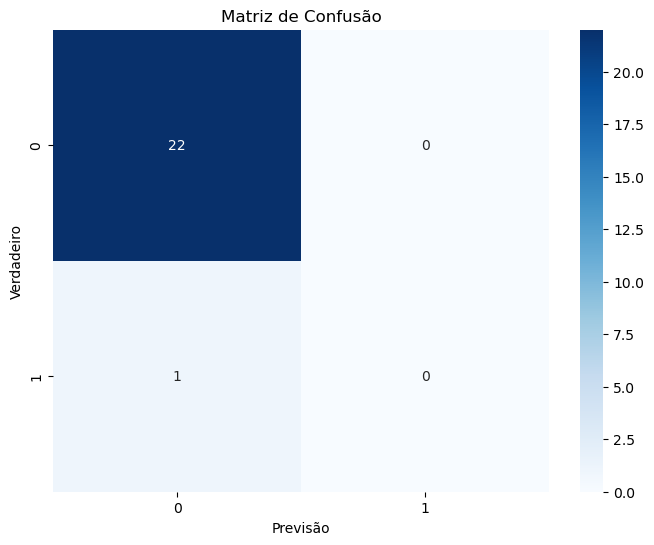

In [291]:
# Calcular a matriz de confusão
cm = confusion_matrix(Y_test, test_pred)

# Plotar a matriz de confusão
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Previsão')
plt.ylabel('Verdadeiro')
plt.title('Matriz de Confusão')
plt.show()

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:676: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=5.
  warnings.warn(


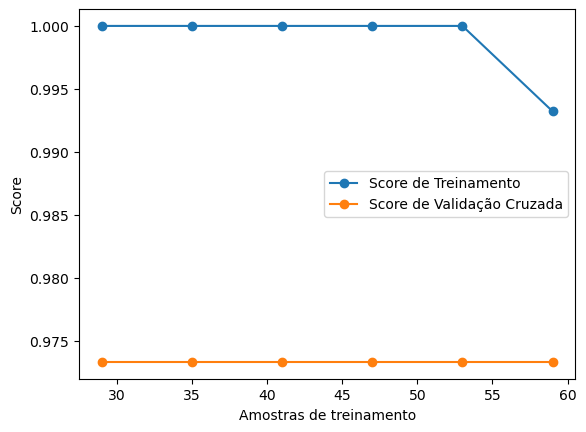

In [292]:
train_sizes, train_scores, test_scores = learning_curve(classifier, X, Y, cv=5, train_sizes=np.linspace(0.1, 1.0, 10))

train_scores_mean = np.mean(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)

plt.plot(train_sizes, train_scores_mean, 'o-', label="Score de Treinamento")
plt.plot(train_sizes, test_scores_mean, 'o-', label="Score de Validação Cruzada")
plt.legend(loc="best")
plt.xlabel("Amostras de treinamento")
plt.ylabel("Score")
plt.show()

In [293]:
# F-score nos dados de treinamento
f1_train = f1_score(Y_train, train_pred)

print("F-score nos dados de treinamento = {}".format(f1_train))

F-score nos dados de treinamento = 1.0


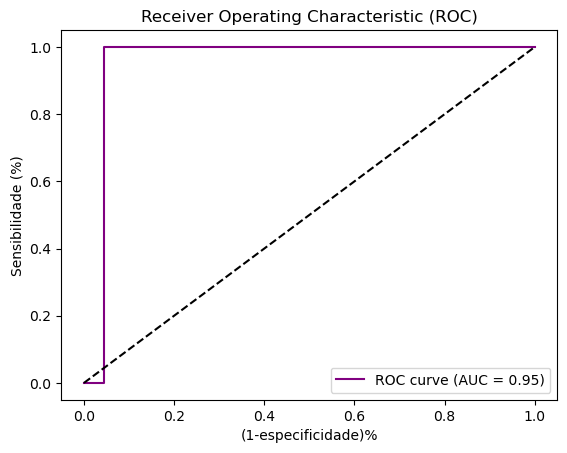

In [294]:
# Calcular as probabilidades das classes positivas
probabilities = classifier.decision_function(X_test)

# Calcular a taxa de falsos positivos e a taxa de verdadeiros positivos
fpr, tpr, thresholds = roc_curve(Y_test, probabilities)

# Calcular a área sob a curva ROC (AUC-ROC)
auc = roc_auc_score(Y_test, probabilities)

# Plotar a curva ROC
plt.plot(fpr, tpr, color='purple', label='ROC curve (AUC = {:.2f})'.format(auc))
plt.plot([0, 1], [0, 1], 'k--')  # Linha de referência para uma classificação aleatória
plt.xlabel('(1-especificidade)%')
plt.ylabel('Sensibilidade (%)')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc='lower right')
plt.show()

## 🔮Input para predição

In [402]:
# Exemplo de valores de precipitação, pluviômetro e umidade a serem previstos
novo_dado = np.array([[0, 0, 76]])

# Aplicar a transformação aos novos dados
novo_dado_transformado = scaler.transform(novo_dado)

# Fazer a predição dos deslizamentos
predicao = classifier.predict(novo_dado_transformado)

if predicao == 1:
    print("Desliza")
else:
    print("Não desliza")

Desliza


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


## Modelo com 1000 linhas

In [403]:
# Importar dataset

df = pd.read_excel(r"C:\Users\Usuário\Desktop\dataset_deslizamentos_1000.xlsx")
print(df.head()) # mostra as primeiras 5 linhas

   precipitacao  pluviometro  umidade  deslizamento
0             0            0       20             0
1             1           50       36             0
2             0            0       36             0
3             1           15       38             0
4             0            0       38             0


In [404]:
# Verificar o total de linhas e colunas no dataset

df.shape

(1000, 4)

In [405]:
# Descrever dados estatísticos do dataset

df.describe()

,precipitacao,pluviometro,umidade,deslizamento
count,1000.000000,1000.000000,1000.00000,1000.00000
mean,0.495000,11.143000,43.93400,0.04600
std,0.500225,13.401274,15.34011,0.20959
min,0.000000,0.000000,-10.00000,0.00000
25%,0.000000,0.000000,33.00000,0.00000
50%,0.000000,0.000000,44.00000,0.00000
75%,1.000000,20.000000,55.00000,0.00000
max,1.000000,70.000000,85.00000,1.00000


In [406]:
# Verificar o número de ocorrências de deslizamento e não deslizamento (sim e não)

df['deslizamento'].value_counts()

0    954
1     46
Name: deslizamento, dtype: int64

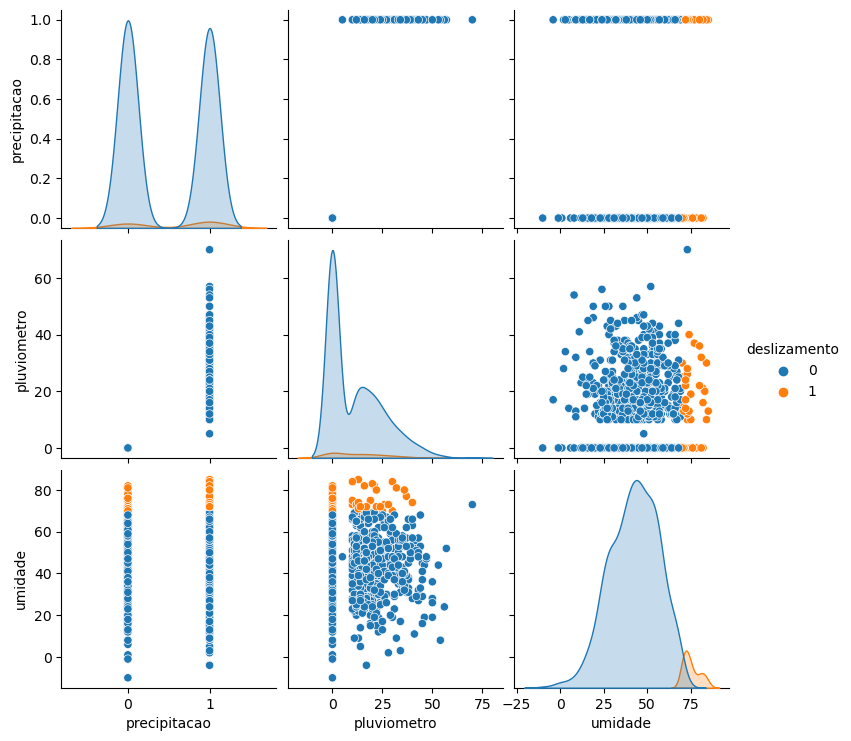

In [408]:
sb.pairplot(df, hue = "deslizamento")

In [361]:
# Separação das variáveis

X = df.drop(columns='deslizamento', axis=1)
Y = df['deslizamento']

In [362]:
# Variáveis independentes

print(X)

     precipitacao  pluviometro  umidade
0               0            0       20
1               1           50       36
2               0            0       36
3               1           15       38
4               0            0       38
..            ...          ...      ...
995             0            0       31
996             1           34       17
997             0            0       36
998             1           16       46
999             1           20       24

[1000 rows x 3 columns]


In [363]:
# Variáveis independentes

print(Y)

0      0
1      0
2      0
3      0
4      0
      ..
995    0
996    0
997    0
998    0
999    0
Name: deslizamento, Length: 1000, dtype: int64


In [364]:
# Criação de instância e fit

scaler = StandardScaler()
scaler.fit(X)

StandardScaler()

In [365]:
# Transformar as variáveis "x" em dados de entrada

standarized_data = scaler.transform(X) 
X = standarized_data 

print(X)
print(Y)

[[-0.9900495  -0.83190417 -1.56100423]
 [ 1.0100505   2.90095129 -0.51746501]
 [-0.9900495  -0.83190417 -0.51746501]
 ...
 [-0.9900495  -0.83190417 -0.51746501]
 [ 1.0100505   0.36260958  0.134747  ]
 [ 1.0100505   0.66123801 -1.30011942]]
0      0
1      0
2      0
3      0
4      0
      ..
995    0
996    0
997    0
998    0
999    0
Name: deslizamento, Length: 1000, dtype: int64


In [366]:
# Dividir o dataset na proporção 70/30 

X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size=0.3, stratify = Y, random_state=2)

# Imprimir o tamanho do dataset original
print("Dataset original:", X.shape)

# Imprimir o dataset de teste
print("Dataset de teste:", X_test.shape)

# Imprimir o dataset de treinamento
print("Dataset de treinamento (X_train):", X_train.shape)

Dataset original: (1000, 3)
Dataset de teste: (300, 3)
Dataset de treinamento (X_train): (700, 3)


## 🦾 Criação do modelo 

In [367]:
classifier = svm.SVC(kernel='linear')

In [368]:
# Treinar modelo usando o dataset de teste
classifier.fit(X_train, Y_train)

SVC(kernel='linear')

In [369]:
# Acurácia nos dados de treinamento
train_pred = classifier.predict(X_train)
accuracy_train = accuracy_score(train_pred, Y_train)

In [370]:
print("Pontuação de acurácia dos dados de treinamento = {}".format(accuracy_train))

Pontuação de acurácia dos dados de treinamento = 0.99


In [371]:
#Acurácia no dados de teste
test_pred = classifier.predict(X_test)
accuracy_test = accuracy_score(test_pred, Y_test)

In [372]:
print("Pontuação de acurácia dos dados de teste = {}".format(accuracy_test))

Pontuação de acurácia dos dados de teste = 0.99


## 📊 Métricas

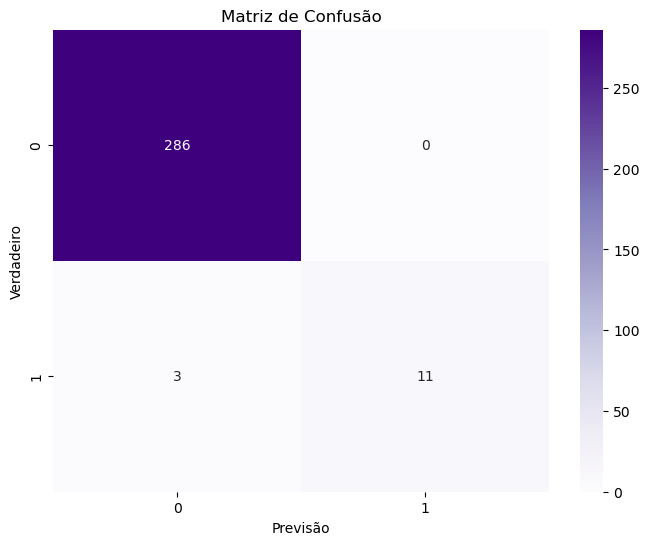

In [373]:
# Calcular a matriz de confusão
cm = confusion_matrix(Y_test, test_pred)

# Plotar a matriz de confusão
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Purples')
plt.xlabel('Previsão')
plt.ylabel('Verdadeiro')
plt.title('Matriz de Confusão')
plt.show()

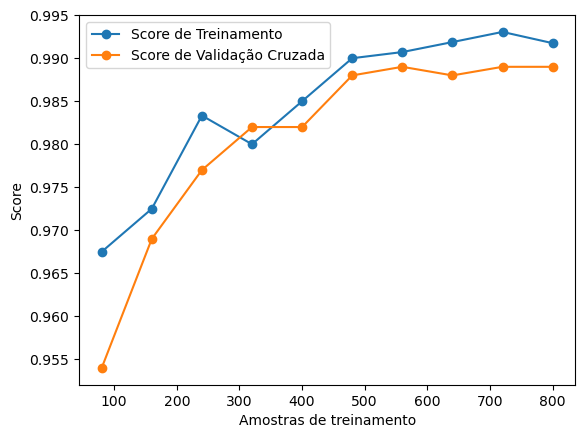

In [374]:
train_sizes, train_scores, test_scores = learning_curve(classifier, X, Y, cv=5, train_sizes=np.linspace(0.1, 1.0, 10))

train_scores_mean = np.mean(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)

plt.plot(train_sizes, train_scores_mean, 'o-', label="Score de Treinamento")
plt.plot(train_sizes, test_scores_mean, 'o-', label="Score de Validação Cruzada")
plt.legend(loc="best")
plt.xlabel("Amostras de treinamento")
plt.ylabel("Score")
plt.show()

In [375]:
# F-score nos dados de treinamento
f1_train = f1_score(Y_train, train_pred)

print("F-score nos dados de treinamento = {}".format(f1_train))

F-score nos dados de treinamento = 0.8813559322033898


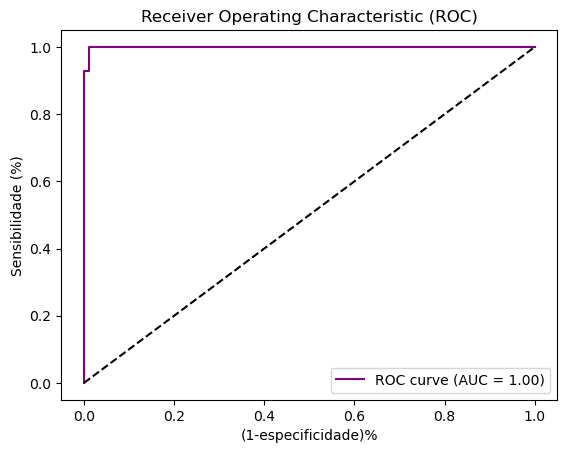

In [376]:
# Calcular as probabilidades das classes positivas
probabilities = classifier.decision_function(X_test)

# Calcular a taxa de falsos positivos e a taxa de verdadeiros positivos
fpr, tpr, thresholds = roc_curve(Y_test, probabilities)

# Calcular a área sob a curva ROC (AUC-ROC)
auc = roc_auc_score(Y_test, probabilities)

# Plotar a curva ROC
plt.plot(fpr, tpr, color='purple', label='ROC curve (AUC = {:.2f})'.format(auc))
plt.plot([0, 1], [0, 1], 'k--')  # Linha de referência para uma classificação aleatória
plt.xlabel('(1-especificidade)%')
plt.ylabel('Sensibilidade (%)')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc='lower right')
plt.show()

## 🔮 Input para predição

In [386]:
# Exemplo de valores de precipitação, pluviômetro e umidade a serem previstos
novo_dado = np.array([[1, 20, 75]])

# Aplicar a transformação aos novos dados
novo_dado_transformado = scaler.transform(novo_dado)

# Fazer a predição dos deslizamentos
predicao = classifier.predict(novo_dado_transformado)

if predicao == 1:
    print("Desliza")
else:
    print("Não desliza")

Desliza


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
